In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline  

In [11]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data"
data = pd.read_csv(url)

# Drop the 'name' column
data = data.drop('name', axis=1)

# Separate features and target
X = data.drop('status', axis=1)  # 'status' is the target (1 = Parkinson's, 0 = Healthy)
y = data['status']

# Handle missing values
X = X.fillna(X.mean())

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions on test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Cross-validation
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Average CV score: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")

Test Set Accuracy: 0.95

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39

Cross-validation scores: [0.96875    0.90322581 0.90322581 0.90322581 0.83870968]
Average CV score: 0.90 ± 0.04


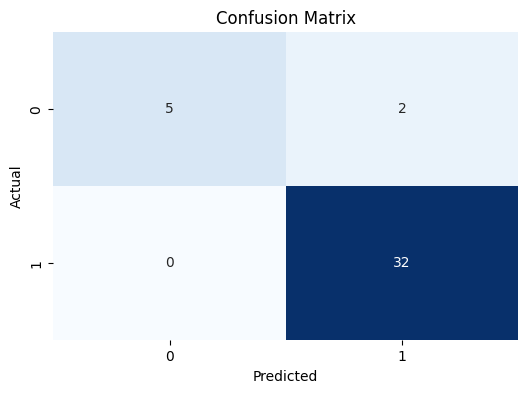

In [13]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
plt.savefig('confusion_matrix.png')  # Save for report
plt.close()

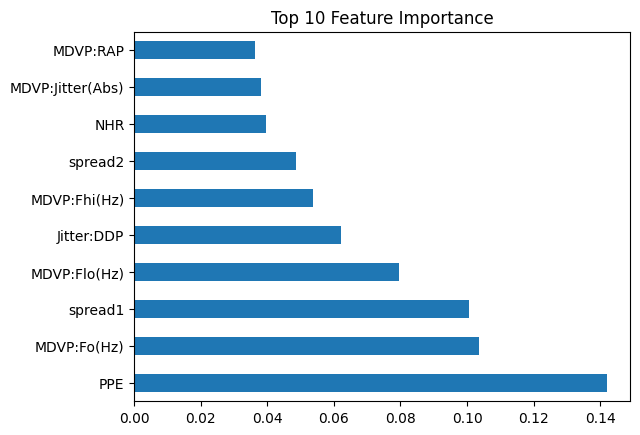

In [14]:
# Plot feature importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importance')
plt.show()
plt.savefig('feature_importance.png')  # Save for report
plt.close()

## Custom Input Prediction
You can predict on new data using:
1. A CSV file (`custom_input.csv`) with 22 features.
2. Manual input via a widget (simulated in the next cell).

**CSV Format Example** (save in `parkinsons_project` directory):
```csv
MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
119.992,157.302,74.997,0.00784,0.00007,0.0037,0.00554,0.01109,0.04374,0.426,0.02182,0.0313,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654


In [17]:
import ipywidgets as widgets
from IPython.display import display
import pandas as pd
import os

# Create input widgets for each feature
feature_names = X.columns
text_boxes = {feature: widgets.FloatText(description=feature, value=0.0) for feature in feature_names}
submit_button = widgets.Button(description="Predict")
output = widgets.Output()

def on_submit_button_clicked(b):
    with output:
        output.clear_output()
        custom_data = pd.DataFrame([[text_box.value for text_box in text_boxes.values()]], columns=feature_names)
        custom_data_scaled = scaler.transform(custom_data)
        prediction = model.predict(custom_data_scaled)[0]
        print(f"Prediction: {'Parkinson’s' if prediction == 1 else 'Healthy'}")

submit_button.on_click(on_submit_button_clicked)

# Display CSV option
print("Option 1: Use custom_input.csv (see Markdown cell for format)")
if os.path.exists('custom_input.csv'):
    custom_data = pd.read_csv('custom_input.csv')
    if list(custom_data.columns) == list(X.columns):
        custom_data_scaled = scaler.transform(custom_data)
        predictions = model.predict(custom_data_scaled)
        for i, pred in enumerate(predictions):
            print(f"Sample {i+1} Prediction: {'Parkinson’s' if pred == 1 else 'Healthy'}")
    else:
        print("Error: CSV columns do not match the required features.")
else:
    print("Error: custom_input.csv not found in the project directory.")

# Display manual input widgets
print("\nOption 2: Enter values below and click Predict")
display(*text_boxes.values(), submit_button, output)

Option 1: Use custom_input.csv (see Markdown cell for format)
Sample 1 Prediction: Parkinson’s

Option 2: Enter values below and click Predict


FloatText(value=0.0, description='MDVP:Fo(Hz)')

FloatText(value=0.0, description='MDVP:Fhi(Hz)')

FloatText(value=0.0, description='MDVP:Flo(Hz)')

FloatText(value=0.0, description='MDVP:Jitter(%)')

FloatText(value=0.0, description='MDVP:Jitter(Abs)')

FloatText(value=0.0, description='MDVP:RAP')

FloatText(value=0.0, description='MDVP:PPQ')

FloatText(value=0.0, description='Jitter:DDP')

FloatText(value=0.0, description='MDVP:Shimmer')

FloatText(value=0.0, description='MDVP:Shimmer(dB)')

FloatText(value=0.0, description='Shimmer:APQ3')

FloatText(value=0.0, description='Shimmer:APQ5')

FloatText(value=0.0, description='MDVP:APQ')

FloatText(value=0.0, description='Shimmer:DDA')

FloatText(value=0.0, description='NHR')

FloatText(value=0.0, description='HNR')

FloatText(value=0.0, description='RPDE')

FloatText(value=0.0, description='DFA')

FloatText(value=0.0, description='spread1')

FloatText(value=0.0, description='spread2')

FloatText(value=0.0, description='D2')

FloatText(value=0.0, description='PPE')

Button(description='Predict', style=ButtonStyle())

Output()